In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as mp

N_files = 162

find_numbers = lambda string: re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", string)
find_value = lambda string: float(find_numbers(string)[-1])

In [2]:
f = open("out/log_50.txt")

for i, x in enumerate(f):
    print(i,x)

0 ROOT_prompt_2:1:31: warning: ISO C++11 does not allow conversion from string literal to 'char *' [-Wwritable-strings]

1 SNN_Tracking(100000, 1, 6, 6, "/lustre/cmsdata/SNN_group/100k_100br.root", 1, 2e-09, 1.25e-10, 8.4e-10, 8.399999999999999e-09, 0.03125, 0.02656, 1, 1, 1, 0.5, 35, 35);

2                               ^

3 

4 

5                                  ------------------------------------

6 

7                                     S   N   N      T r a c k i n g

8 

9                                  ------------------------------------

10 

11 

12 

13 

14          ------------------------------------------------------------------------------------    

15          Unsupervised search for tracks in 8-layer strip detector with spiking neural network    

16                                                                              T.Dorigo, 3/2023    

17          ------------------------------------------------------------------------------------    

18 

19      

In [3]:
#efficiency  -> line 65
#fake rate   -> line 66
#Q value     -> line 67
#selectivity -> line 68

metrics_list = []

for i in range(N_files):
    f = open(f"out/log_{i}.txt")
    log_lines = f.readlines()
    
    efficiency  = find_value(log_lines[65])
    fkrate      = find_value(log_lines[66])
    Qvalue      = find_value(log_lines[67])
    selectivity = find_value(log_lines[68])
    
    metrics = (efficiency, fkrate, Qvalue, selectivity)
    #print(i, *metrics)

    metrics_list.append((i, efficiency, fkrate, Qvalue, selectivity))

print("Selectivity maximum: ")
print(max([line[-1] for line in metrics_list]))

Selectivity maximum: 
0.532168


      PK  Efficiency  Fake Rate   Q value  Selectivity
0      0    0.547152     0.0100  3.855770     0.429335
1      1    0.547546     0.0132  4.066720     0.523016
2      2    0.547152     0.0100  3.855590     0.429270
3      3    0.547546     0.0132  4.066430     0.522909
4      4    0.547152     0.0100  3.856080     0.429448
..   ...         ...        ...       ...          ...
157  157    0.013557     0.0000  0.071599     0.055319
158  158    0.013354     0.0000  0.069636     0.037328
159  159    0.013557     0.0000  0.071589     0.055125
160  160    0.013354     0.0000  0.069636     0.037328
161  161    0.013557     0.0000  0.071599     0.055319

[162 rows x 5 columns]


<Axes: xlabel='PK', ylabel='Selectivity'>

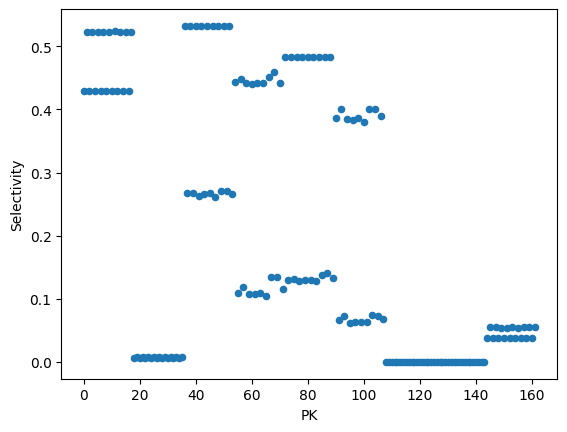

In [8]:
#creating a pandas dataframe:
df = pd.DataFrame(metrics_list, columns =['PK', 'Efficiency', 'Fake Rate', 'Q value', 'Selectivity'])
print(df)
df.plot(x="PK", y="Selectivity", kind="scatter")
